In [1]:
import os
import numpy as np
os.environ["KMP_DUPLICATE_LIB_OK"] = "True"   # MKL 충돌 잠시 우회

import cv2, easyocr


In [2]:
import pandas as pd

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# ── 결과 시각화 ──────────────────────────────────────────
def show_with_boxes(img_path, results):
    img = cv2.imread(img_path)
    for box, txt, conf in results:
        cv2.polylines(img, [np.array(box, dtype=int)], True, (0, 255, 0), 2)
        cv2.putText(img, txt, tuple(box[0]), cv2.FONT_HERSHEY_SIMPLEX,
                    0.7, (0, 255, 0), 2, cv2.LINE_AA)

    # BGR → RGB 변환 후 matplotlib 표시
    plt.figure(figsize=(6, 8))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()


In [4]:
results = reader.readtext(img_path, detail=1)
show_with_boxes(img_path, results)

NameError: name 'reader' is not defined

C:\Users\USER\anaconda3\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


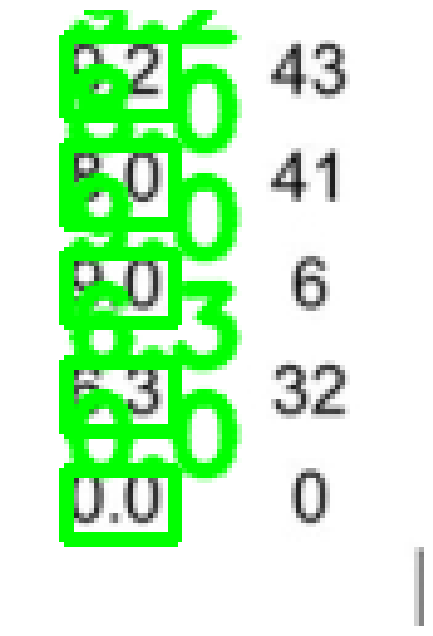

In [24]:
img_path = 'real_data/crop_realdata_num.png'                 # 테스트 이미지
results = reader.readtext(img_path, detail=1)
show_with_boxes(img_path, results)

In [37]:
\                    # 오른쪽 20 % 크롭

# ②–③ 전처리
crop  = cv2.resize(crop, None, fx=4, fy=4, interpolation=cv2.INTER_CUBIC)
g     = cv2.cvtColor(crop, cv2.COLOR_BGR2GRAY)
thr   = cv2.adaptiveThreshold(g,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                              cv2.THRESH_BINARY_INV,31,15)
mask  = cv2.morphologyEx(thr, cv2.MORPH_CLOSE, np.ones((3,3),np.uint8), 2)

# ④ EasyOCR
reader = easyocr.Reader(['en'], gpu=False)
txts   = reader.readtext(mask, allowlist='0123456789',
                         decoder='beamsearch', beamWidth=10,
                         link_threshold=0.05, canvas_size=1024,
                         detail=0)
nums   = [re.sub(r'\D','',t) for t in txts if t.strip()]
print(nums)     # ▶ ['43', '41', '6', '32', '0'] 예상


error: OpenCV(4.12.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4208: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


In [6]:
def show_with_boxes(img_or_path, results):
    """
    img_or_path : 파일 경로(str) 또는 BGR 이미지 배열(np.ndarray)
    """
    import cv2, numpy as np, matplotlib.pyplot as plt

    # ① 경로/배열 구분
    if isinstance(img_or_path, (str, bytes, os.PathLike)):
        img = cv2.imread(img_or_path)
    else:                               # 이미 배열인 경우
        img = img_or_path.copy()

    # ② 박스 그리기
    for box, txt, conf in results:
        cv2.polylines(img, [np.array(box, dtype=int)],
                      True, (0, 255, 0), 4)
        cv2.putText(img, txt, tuple(box[0]),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7,
                    (255, 0, 0), 2, cv2.LINE_AA)

    # ③ matplotlib 출력 (headless 환경 호환)
    plt.figure(figsize=(16, 22))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off'); 
    plt.savefig(f"fig2.png")
    plt.show()


In [81]:
print(len(results), results[:2])      # 몇 개가 검출됐는지 먼저 확인


5 [([[np.int32(11), np.int32(5)], [np.int32(33), np.int32(5)], [np.int32(33), np.int32(21)], [np.int32(11), np.int32(21)]], '9.2', np.float64(0.8834327459335327)), ([[np.int32(11), np.int32(27)], [np.int32(33), np.int32(27)], [np.int32(33), np.int32(43)], [np.int32(11), np.int32(43)]], '8.0', np.float64(0.8852200063345002))]


Using CPU. Note: This module is much faster with a GPU.


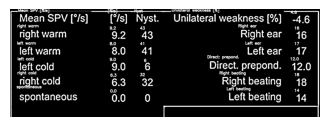

In [85]:
img_path = 'real_data/crop_realdata.png' 
img   = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)
img   = cv2.cvtColor(img, cv2.COLOR_BGRA2BGR)    
crop  = cv2.resize(img , None, fx=4, fy=4, interpolation=cv2.INTER_CUBIC)
g     = cv2.cvtColor(crop, cv2.COLOR_BGR2GRAY)
thr   = cv2.adaptiveThreshold(g,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                              cv2.THRESH_BINARY_INV,31,15)
mask  = cv2.morphologyEx(thr, cv2.MORPH_CLOSE, np.ones((3,3),np.uint8), 2)

#plt.imshow(mask)beamsearch

reader = easyocr.Reader(['en'], gpu=False)
txts   = reader.readtext(mask, #allowlist='0123456789.-',
                         decoder='greedy', beamWidth=100,
                         link_threshold=0.05, canvas_size=1024,
                         detail=1)
#txts
show_with_boxes(mask,txts)

In [7]:

img_path = r"real_data/crop_realdata2.png"
img  = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)
if img.shape[2] == 4:                               # 알파 포함이면
    img = cv2.cvtColor(img, cv2.COLOR_BGRA2BGR)

# 1) 4× 업스케일
crop = cv2.resize(img, None, fx=4, fy=4,
                  interpolation=cv2.INTER_CUBIC)

# 2) 그레이 + 어댑티브 이진화
g   = cv2.cvtColor(crop, cv2.COLOR_BGR2GRAY)
thr = cv2.adaptiveThreshold(g, 255,
                            cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                            cv2.THRESH_BINARY_INV,
                            31, 15)

# 3) 선 굵히기 (dilate → erode)
k   = np.ones((5,5), np.uint8)
mask = cv2.dilate(thr, k, 2)
mask = cv2.erode(mask, k, 2)

# 4) 가로 끊김 연결
k_h = cv2.getStructuringElement(cv2.MORPH_RECT, (3,2))
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, k_h, 1)

reader = easyocr.Reader(['en'], gpu=True)
txts   = reader.readtext(mask, #allowlist='0123456789.-',
                         decoder='beamsearch', beamWidth=5,
                         link_threshold=0.15, canvas_size=1024*2,
                         detail=1)
#txts
#show_with_boxes(mask,txts)

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


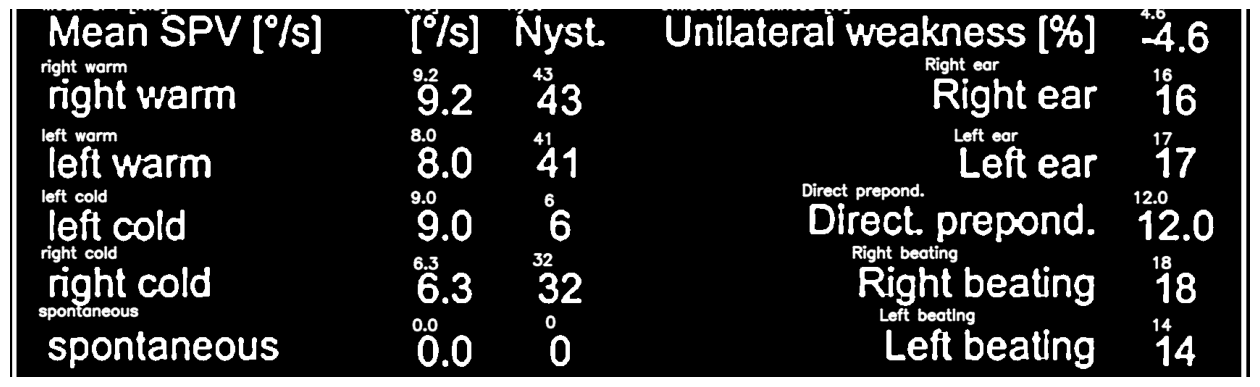

In [18]:
show_with_boxes(mask,txts)

In [8]:
ocr_results = []
for _, text, conf in txts:
    ocr_results.append({
       # "filename": path.split('/')[-1],
        "text": text,
        "confidence": round(conf, 2)})

In [26]:
y = pd.read_csv("y_real.csv", encoding = 'cp949')
y

,y
0,Mean SPV [°/s]
1,[°/s]
2,Nyst.
3,Unilateral weakness [%]
4,-4.6
5,right warm
6,9.2
7,43
8,Right ear
9,16


In [41]:

pred = pd.DataFrame(ocr_results)[['text']]

In [42]:
from scipy import stats

def accuracy_ci(pred, true, alpha=0.05, method="wilson"):
    pred, true = np.asarray(pred), np.asarray(true)
    if pred.shape[0] != true.shape[0]:
        raise ValueError("pred와 true 길이가 다릅니다.")

    n  = pred.size
    k  = int((pred == true).sum())   # 맞춘 개수
    p  = k / n                       # 정확도
    z  = stats.norm.ppf(1 - alpha/2) # 양측 z값 (≈1.96)

    if method == "normal":           # 정규 근사
        se  = np.sqrt(p * (1 - p) / n)
        low = max(0.0, p - z * se)
        high= min(1.0, p + z * se)

    elif method == "wilson":         # Wilson score
        denom = 1 + z**2 / n
        centre= (p + z**2/(2*n)) / denom
        half  = z * np.sqrt((p*(1 - p) + z**2/(4*n)) / n) / denom
        low, high = centre - half, centre + half

    elif method == "clopper":        # exact (beta)
        low  = stats.beta.ppf(alpha/2, k, n - k + 1) if k > 0 else 0.0
        high = stats.beta.ppf(1 - alpha/2, k + 1, n - k) if k < n else 1.0

    else:
        raise ValueError("method는 'normal', 'wilson', 'clopper' 중 하나여야 합니다.")

    return p, low, high


name_acc, name_low, name_high = accuracy_ci(pred,y)

print(f"이름  정확도: {name_acc:.3f}  (95% CI {name_low:.3f}–{name_high:.3f})")

이름  정확도: 0.800  (95% CI 0.627–0.905)


In [43]:
from scipy.stats import t
import numpy as np
import Levenshtein as lev  

# ─────────────────────────────────────────────────────────────
# 1. 점 추정값(평균) · 95 % 신뢰구간 계산
#    - 입력: 1차원 배열 또는 리스트(scores)
#    - 반환: (mean, ci_low, ci_high)
# ─────────────────────────────────────────────────────────────

def lev_similarity(a: str, b: str) -> float:
    return lev.ratio(str(a), str(b))     
    
def mean_ci(scores, alpha: float = 0.05):
    scores = np.asarray(scores, dtype=float)
    n      = len(scores)
    m      = scores.mean()
    se     = scores.std(ddof=1) / np.sqrt(n)   # 표준오차
    tcrit  = t.ppf(1 - alpha/2, df=n-1)        # t_(n-1, 0.975)
    half_w = tcrit * se                        # 반폭
    return m, m - half_w, m + half_w

# ─────────────────────────────────────────────────────────────
# 2. 실제값 기준 평균 유사도 + 95 % CI 한 번에
# ─────────────────────────────────────────────────────────────
def similarity_with_ci(pred_list, true_list, **sim_kws):
    # 샘플별 유사도 벡터 만들기
    m = len(true_list)
    sims = [lev_similarity(pred_list.iloc[i,:], true_list.iloc[i,:], **sim_kws)
            if i < len(pred_list) else 0.0
            for i in range(m)]
    return mean_ci(sims)       # (mean, lower, upper) 튜플

def similarity_with_ci(pred_list, true_list, **sim_kws):
    # 샘플별 유사도 벡터 만들기
    m = len(true_list)
    sims = [lev_similarity(pred_list.iloc[i,:], true_list.iloc[i,:], **sim_kws)
            if i < len(pred_list) else 0.0
            for i in range(m)]
    return mean_ci(sims)   

name_mean, name_low, name_high = similarity_with_ci( pred,y)


print(f"유사도  : 평균 {name_mean:.3f}  (95% CI {name_low:.3f}–{name_high:.3f})")
#print(f"진단명: 평균 {jin_mean :.3f}  (95% CI {jin_low :.3f}–{jin_high :.3f})")
#print(f"처방전: 평균 {che_mean :.3f}  (95% CI {che_low :.3f}–{che_high :.3f})")


유사도  : 평균 0.923  (95% CI 0.915–0.930)


In [57]:
p

array([0.86966667])

In [60]:
alpha = 0.05
con = pd.DataFrame(ocr_results)[['confidence']].values
p = pd.DataFrame(ocr_results)[['confidence']].mean().values
z  = stats.norm.ppf(1 - alpha/2) 
se  =  np.sum((con - p)**2) / len(con)
low = max(0.0, p - z * se)
high= min(1.0, p + z * se)

p , low, high

print(f"신뢰도: {p[0]:.3f}  (95% CI {low[0]:.3f}–{high[0]:.3f})")

신뢰도: 0.870  (95% CI 0.810–0.929)


In [77]:
y.values[i].astype(float)

array([-4.6])

In [105]:
def to_numeric_series(col: pd.Series) -> pd.Series:
    """
    ± 부호·소수점을 포함한 숫자만 추려 float64로 변환
    변환 불가 항목은 NaN.
    """
    # ① str 변환 → ② (-)?digit+( .digit+ )? 패턴 추출
    extracted = (
        col.astype(str)
           .str.extract(r'(-?\d+(?:\.\d+)?)', expand=False)   # 음수·소수 지원
           .replace("", np.nan)                              # 빈칸 → NaN
    )
    # ③ 실수형으로 안전 변환
    return pd.to_numeric(extracted, errors="coerce")

# 모든 열에 한꺼번에 적용 (숫자 변환 안 될 열은 그대로 NaN)
df_numeric = y.apply(to_numeric_series)

num_y = df_numeric.dropna()

num_pred = pred.iloc[num_y.index.values,:].astype(float)

In [121]:
name_acc, name_low, name_high = accuracy_ci(num_pred,num_y)

print(f"정확도: {name_acc:.3f}  (95% CI {name_low:.3f}–{name_high:.3f})")

name_mean, name_low, name_high = similarity_with_ci(num_pred,num_y)


print(f"유사도  : 평균 {name_mean:.3f}  (95% CI {name_low:.3f}–{name_high:.3f})")

정확도: 0.938  (95% CI 0.717–0.989)
유사도  : 평균 0.926  (95% CI 0.922–0.931)


In [118]:
pred_belif.mean()

confidence    0.869375
dtype: float64

In [120]:
pred_belif =  pd.DataFrame(ocr_results)[['confidence']].iloc[num_y.index.values,:].astype(float)


alpha = 0.05
con =pred_belif.values
p = pred_belif.mean().values
z  = stats.norm.ppf(1 - alpha/2) 
se  =  np.sum((con - p)**2) / len(con)
low = max(0.0, p - z * se)
high= min(1.0, p + z * se)

p , low, high

print(f"신뢰도: {p[0]:.3f}  (95% CI {low[0]:.3f}–{high[0]:.3f})")

신뢰도: 0.869  (95% CI 0.778–0.960)
